todo: \\
truncate till 4 decimal places \\
remove 1 and 0 \\


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import numpy as np
from tqdm.notebook import tqdm
from tqdm.keras import TqdmCallback
from matplotlib import pyplot as plt
import math

In [ ]:
!wget https://github.com/darthsimpus/color_rpi/blob/main/color_model_trunc_unique6.h5

--2021-10-07 18:21:23--  https://github.com/darthsimpus/color_rpi/blob/main/color_model_trunc_unique6.h5
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘color_model_trunc_unique6.h5.1’

color_model_trunc_u     [ <=>                ] 128.58K  --.-KB/s    in 0.04s   

2021-10-07 18:21:23 (3.05 MB/s) - ‘color_model_trunc_unique6.h5.1’ saved [131670]



In [ ]:
from tensorflow import keras
import numpy as np
model = keras.models.load_model("./color_model_trunc_unique6.h5")
model.predict(np.array(np.array(sorted([15,16,17])).reshape(1,3))/255.0)

array([[0.15706655]], dtype=float32)

In [ ]:
def truncate(n, decimals=0):
    multiplier = 10 ** decimals
    return int(n * multiplier) / multiplier

In [ ]:
## dataset generation code
# f = open("sample_no_01_trunc.csv","w")
d = {}
for r in range(256):
  for g in range(256):
    for b in range(256):
      t = str(str(r)+","+str(g)+","+str(b))
      rr, gg, bb = r/255.0, g/255.0, b/255.0
      mx = max(rr, gg, bb)
      mn = min(rr, gg, bb)
      df = mx-mn
      if mx == 0:
        s = 0
      else:
        s = (df/mx)*100
      if (s!=0 and s!=100):
        f=""
        res=[str(gg)+"," for gg in sorted([int(tt) for tt in t.split(',')])]
        for i in range(3):
          f=f+res[i]
        f=f[:-1]
        if f not in d.keys():
          d[f] = truncate(s,4) 
        # f.write(t+str(truncate(s,4))+"\n")
        # f.write(t+str(truncate(s,4))+"\n")
# f.close()
print("file made")

In [ ]:
# # define the dataset
x=[]
y=[]
df = pd.read_csv('sample_no_01_trunc.csv',header=None)
df.rename(columns={0: 'R', 1: 'G', 2: 'B', 3: 'S'}, inplace=True)
for i in tqdm(range(len(df))):
    x.append((df.loc[i,'R'],df.loc[i,'G'],df.loc[i,'B']))
    y.append(df.loc[i,'S'])
x = np.asarray(x)
y = np.asarray(y)
# # print(x.min(), x.max(), y.min(), y.max())
# # reshape arrays into into rows and cols
x = x.reshape((len(x), 3))
y = y.reshape((len(y), 1))

np.savez_compressed("saved_x_y_no_01_trunc.npz",x=x,y=y)

In [ ]:
arr=[]
keys = list(d.keys())
val = list(d.values())

In [ ]:
for i in range(len(keys)):
  keys[i] = [int(tt) for tt in keys[i].split(',')]
display(keys,val)

In [ ]:
keys = np.asarray(keys).reshape(len(keys),3)
val = np.asarray(val).reshape(len(val),1)
np.savez_compressed('saved_unique_combo_no_01.npz',x=keys,y=val)

In [ ]:
retrievedData = np.load("saved_x_y_no_01_trunc4.npz")
x = retrievedData['x']
y = retrievedData['y']

# np.savez_compressed("saved_x_y_no_01.npz",x=x,y=y)
# separately scale the input and output variables
# separately scale the input and output variables
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)
print(len(x))
tf.config.list_physical_devices('GPU')

In [ ]:
print("x=",x)
print("y=",y)

In [ ]:
model = tf.keras.models.load_model('color_model_trunc_unique5.h5')

In [ ]:
with tf.device('/GPU:0'):  # print(x.min(), x.max(), y.min(), y.max())
  # design the neural network model
  initialiser = 'he_uniform'
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(170, input_dim=3, activation='relu', kernel_initializer=initialiser))
  model.add(tf.keras.layers.Dense(85, activation='relu', kernel_initializer=initialiser))
  model.add(tf.keras.layers.Dense(40, activation='relu', kernel_initializer=initialiser))
  model.add(tf.keras.layers.Dense(10, activation='relu', kernel_initializer=initialiser))
  model.add(tf.keras.layers.Dense(1))
  # define the loss function and optimization algorithm
  opt = tf.keras.optimizers.Adam(learning_rate=1e-9)
  model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])
  # ft the model on the training dataset                               
  model.fit(x, y, epochs=4000, batch_size=10000,callbacks=[TqdmCallback(verbose=1)])
  # make predictions for the input data
  # # inverse transforms
  # x_plot = scale_x.inverse_transform(x)
  # y_plot = scale_y.inverse_transform(y)
  # yhat_plot = scale_y.inverse_transform(yhat)
  model.save('color_model_trunc_unique6.h5')

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Streaming output truncated to the last 5000 lines.
Epoch 1501/4000
280/280 [==============================] - 1s 4ms/step - loss: 2.4852e-07
Epoch 1502/4000
280/280 [==============================] - 1s 4ms/step - loss: 3.1031e-07
Epoch 1503/4000
280/280 [==============================] - 1s 4ms/step - loss: 3.5707e-07
Epoch 1504/4000
280/280 [==============================] - 1s 4ms/step - loss: 2.8430e-07
Epoch 1505/4000
280/280 [==============================] - 1s 4ms/step - loss: 2.8604e-07
Epoch 1506/4000
280/280 [==============================] - 1s 4ms/step - loss: 2.3892e-07
Epoch 1507/4000
280/280 [==============================] - 1s 4ms/step - loss: 2.9362e-07
Epoch 1508/4000
280/280 [==============================] - 1s 4ms/step - loss: 2.8119e-07
Epoch 1509/4000
280/280 [==============================] - 1s 4ms/step - loss: 3.5178e-07
Epoch 1510/4000
280/280 [==============================] - 1s 4ms/step - loss: 2.2908e-07
Epoch 1511/4000
280/280 [========================

In [ ]:
#retrain model
initialiser = 'he_uniform'
model = tf.keras.models.load_model("./color_model5_2.h5")
model.pop()
opt = tf.keras.optimizers.Adam(learning_rate=1e-8)
model.compile(loss='mse', optimizer='adam')
model.add(tf.keras.layers.Dense(10, activation='relu', kernel_initializer=initialiser,name='dense_4'))
model.add(tf.keras.layers.Dense(10, activation='relu', kernel_initializer=initialiser,name='dense_5'))
model.add(tf.keras.layers.Dense(10, activation='relu', kernel_initializer=initialiser,name='dense_6'))
model.add(tf.keras.layers.Dense(10, activation='relu', kernel_initializer=initialiser,name='dense_7'))
model.add(tf.keras.layers.Dense(10, activation='relu', kernel_initializer=initialiser,name='dense_8'))
model.summary()

In [ ]:
model.fit(x, y, epochs=1000, batch_size=100000, verbose=1,callbacks=[TqdmCallback(verbose=1)])

In [ ]:
with tf.device('/GPU:0'):  # print(x.min(), x.max(), y.min(), y.max())
  # design the neural network model
  initialiser = 'GlorotUniform'
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(784, input_dim=3, activation='tanh' , kernel_initializer=initialiser))
  model.add(tf.keras.layers.Dense(512, activation='sigmoid', kernel_initializer=initialiser))
  model.add(tf.keras.layers.Dense(512, activation='sigmoid', kernel_initializer=initialiser))
  model.add(tf.keras.layers.Dense(256, activation='relu', kernel_initializer=initialiser))
  model.add(tf.keras.layers.Dense(256, activation='relu', kernel_initializer=initialiser))
  model.add(tf.keras.layers.Dense(1))
  # define the loss function and optimization algorithm
  # opt = tf.keras.optimizers.Adam(learning_rate=1e-8)
  model.compile(loss='mse', optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
  # ft the model on the training dataset                               # re run this.
  model.fit(x, y, epochs=10, batch_size=10000, verbose=1,callbacks=[TqdmCallback(verbose=1)])
  # make predictions for the input data
  # # inverse transforms
  # x_plot = scale_x.inverse_transform(x)
  # y_plot = scale_y.inverse_transform(y)
  # yhat_plot = scale_y.inverse_transform(yhat)
  model.save('color_model__.h5')

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/10
 73/280 [======>.......................] - ETA: 1:08 - loss: 4923.4473 - accuracy: 0.0000e+00

KeyboardInterrupt: ignored

In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
ourModel = keras.models.load_model("color_model_trunc_unique6.h5")
x = np.load("saved_unique_combo_no_01.npz")['x']
y = np.load("saved_unique_combo_no_01.npz")['y']

In [ ]:
def truncate(n, decimals=0):
    multiplier = 10 ** decimals
    return int(n * multiplier) / multiplier

In [ ]:
for item in [[156,179,210],[110,169,198],[90,125,133],[121,130,140],[67,129,211],[132,195,219],[200,210,220],[85,110,135],[150,199,234],[123,241,250]]:
  item = sorted(item)
  mx = max(item[0],item[1], item[2])
  mn = min(item[0],item[1], item[2])
  df = mx-mn
  if mx == 0:
    s = 0
  else:
    s = (df/mx)
  print(s,(truncate(float(ourModel.predict([sorted([item[0]/255.,item[1]/255.,item[2]/255.])])),4)-s)*100/s)

0.2571428571428571 0.13888888888890136
0.4444444444444444 0.057500000000001994
0.3233082706766917 0.4304651162790718
0.1357142857142857 1.9789473684210568
0.6824644549763034 -0.03875000000000344
0.3972602739726027 0.010000000000002153
0.09090909090909091 0.7599999999999981
0.37037037037037035 0.3050000000000047
0.358974358974359 0.007142857142852788
0.508 0.01968503937007657


In [ ]:
# plot x vs y
# plt.scatter(x_plot,y_plot, label='Actual')
# plot x vs yhat
yhat = ourModel.predict(x)

In [ ]:
np.savez_compressed("yhat_unique.npz",yhat=yhat)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)
print("x=",x)
print("y=",y)

x= [[0.         0.         0.        ]
 [0.         0.         0.00395257]
 [0.         0.         0.00790514]
 ...
 [0.99604743 1.         1.        ]
 [1.         0.99606299 1.        ]
 [1.         1.         1.        ]]
y= [[0.5000005 ]
 [0.667984  ]
 [0.75197675]
 ...
 [0.003953  ]
 [0.        ]
 [0.        ]]


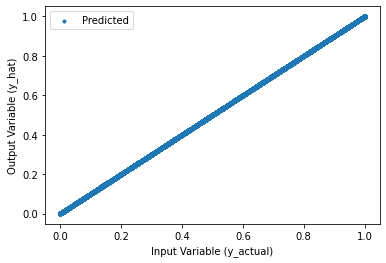

In [ ]:
plt.scatter(y,yhat,marker=".", label='Predicted')
plt.xlabel('Input Variable (y_actual)')
plt.ylabel('Output Variable (y_hat)')
plt.legend()
plt.show()

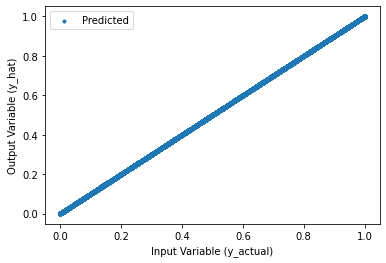

In [ ]:
plt.scatter(y,yhat,marker=".", label='Predicted')
plt.xlabel('Input Variable (y_actual)')
plt.ylabel('Output Variable (y_hat)')

plt.legend()
plt.show()

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(ourModel)
tflite_model = converter.convert()
open("color_model_trunc_unique6.tflite","wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpbr9es3m4/assets


INFO:tensorflow:Assets written to: /tmp/tmpbr9es3m4/assets


78756

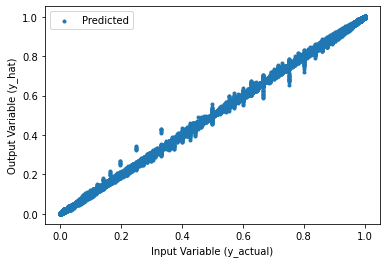

In [ ]:
plt.scatter(y,yhat,marker=".", label='Predicted')
plt.xlabel('Input Variable (y_actual)')
plt.ylabel('Output Variable (y_hat)')
plt.plot([0,0], [1,1])
plt.legend()
plt.show()

In [ ]:
y_err = yhat - y
plt.scatter([yhat - y for i in yhat])
plt.show()

In [ ]:
# report model error
print('MSE: %.8f' % mean_squared_error(y, yhat))

MSE: 0.00018032


In [ ]:
RGB = np.asarray([[1, 1, 2]])
RGB.reshape((len(RGB), 3))
ourModel.predict(RGB)

array([[0.53945684]], dtype=float32)

In [ ]:
with tf.device('/GPU:0'):  # print(x.min(), x.max(), y.min(), y.max())
  # design the neural network model
  initialiser = 'GlorotUniform'
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(170, input_dim=3, activation='sigmoid', kernel_initializer=initialiser))
  model.add(tf.keras.layers.Dense(85, activation='sigmoid', kernel_initializer=initialiser))
  model.add(tf.keras.layers.Dense(40, activation='sigmoid', kernel_initializer=initialiser))
  model.add(tf.keras.layers.Dense(10, activation='sigmoid', kernel_initializer=initialiser))
  model.add(tf.keras.layers.Dense(1))
  # define the loss function and optimization algorithm
  opt = tf.keras.optimizers.Adam(learning_rate=1e-8)
  model.compile(loss='mse', optimizer=opt)
  # ft the model on the training dataset
  model.fit(x, y, epochs=1000, batch_size=10000,use_multiprocessing=True, verbose=0,callbacks=[TqdmCallback(verbose=1)])
  model.save('color_model7.h5')

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

KeyboardInterrupt: ignored

In [ ]:
with tf.device('/GPU:0'):  # print(x.min(), x.max(), y.min(), y.max())
  # design the neural network model
  initialiser = 'GlorotUniform'
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(170, input_dim=3, activation='relu', kernel_initializer=initialiser))
  model.add(tf.keras.layers.Dense(150, activation='relu', kernel_initializer=initialiser))
  model.add(tf.keras.layers.Dense(130, activation='relu', kernel_initializer=initialiser))
  model.add(tf.keras.layers.Dense(110, activation='relu', kernel_initializer=initialiser))
  model.add(tf.keras.layers.Dense(90, activation='relu', kernel_initializer=initialiser))
  model.add(tf.keras.layers.Dense(70, activation='relu', kernel_initializer=initialiser))
  model.add(tf.keras.layers.Dense(50, activation='relu', kernel_initializer=initialiser))
  model.add(tf.keras.layers.Dense(30, activation='relu', kernel_initializer=initialiser))
  model.add(tf.keras.layers.Dense(10, activation='relu', kernel_initializer=initialiser))
  model.add(tf.keras.layers.Dense(1))
  # define the loss function and optimization algorithm
  opt = tf.keras.optimizers.Adam(learning_rate=1e-8)
  model.compile(loss='mse', optimizer=opt)
  # ft the model on the training dataset


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

KeyboardInterrupt: ignored

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 170)               680       
_________________________________________________________________
dense_13 (Dense)             (None, 150)               25650     
_________________________________________________________________
dense_14 (Dense)             (None, 130)               19630     
_________________________________________________________________
dense_15 (Dense)             (None, 110)               14410     
_________________________________________________________________
dense_16 (Dense)             (None, 90)                9990      
_________________________________________________________________
dense_17 (Dense)             (None, 70)                6370      
_________________________________________________________________
dense_18 (Dense)             (None, 50)               

In [ ]:
with tf.device('/GPU:0'):  # print(x.min(), x.max(), y.min(), y.max())
  model.fit(x, y, epochs=1000, batch_size=100000,use_multiprocessing=True, verbose=0,callbacks=[TqdmCallback(verbose=1)])
  model.save('color_model7.h5')

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

KeyboardInterrupt: ignored

In [ ]:
from tensorflow import keras
import tensorflow as tf
model = keras.models.load_model("/content/color_model_trunc_unique6.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
converter.target_spec.supported_types = [tf.float16]
tflite_quant_model = converter.convert()#save converted quantization model to tflite format
open("color_model_unique6_optimised_for_size_f16.tflite", "wb").write(tflite_quant_model)

INFO:tensorflow:Assets written to: /tmp/tmpozt3rje5/assets


INFO:tensorflow:Assets written to: /tmp/tmpozt3rje5/assets


42128

In [ ]:
from tensorflow import keras
import tensorflow as tf
model = keras.models.load_model("/content/color_model_trunc_unique6.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_quant_model = converter.convert()#save converted quantization model to tflite format
open("color_model_unique6_optimised_default.tflite", "wb").write(tflite_quant_model)

INFO:tensorflow:Assets written to: /tmp/tmpd2n6kv9g/assets


INFO:tensorflow:Assets written to: /tmp/tmpd2n6kv9g/assets


25488

In [ ]:
from tensorflow import keras
import tensorflow as tf
model = keras.models.load_model("/content/color_model_trunc_unique6.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_LATENCY]

tflite_quant_model = converter.convert()#save converted quantization model to tflite format
open("color_model_unique6_optimised_latency.tflite", "wb").write(tflite_quant_model)

INFO:tensorflow:Assets written to: /tmp/tmpy400bdxw/assets


INFO:tensorflow:Assets written to: /tmp/tmpy400bdxw/assets


25488

In [ ]:
from tensorflow import keras
import tensorflow as tf
model = keras.models.load_model("/content/color_model_trunc_unique6.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
converter.target_spec.supported_types = [tf.float8]
tflite_quant_model = converter.convert()#save converted quantization model to tflite format
open("color_model_unique6_optimised_f8.tflite", "wb").write(tflite_quant_model)

AttributeError: ignored

In [ ]:
from tensorflow import keras
import tensorflow as tf
model = keras.models.load_model("/content/color_model_trunc_unique6.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.uint8]
tflite_quant_model = converter.convert()#save converted quantization model to tflite format
open("color_model_unique6_optimised_default_uint8.tflite", "wb").write(tflite_quant_model)

INFO:tensorflow:Assets written to: /tmp/tmpsuk11120/assets


INFO:tensorflow:Assets written to: /tmp/tmpsuk11120/assets


78756

In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np

In [ ]:
model = tf.keras.models.load_model("color_model_trunc_unique6.h5")

In [ ]:
W_Input_Hidden = model.layers[0].get_weights()[0]
W_Output_Hidden = model.layers[1].get_weights()[0]

#summary = model.summary(model)

#print(summary)
print('INPUT-HIDDEN LAYER WEIGHTS:')
print(W_Input_Hidden.shape)
print('HIDDEN-OUTPUT LAYER WEIGHTS:')
print(W_Output_Hidden.shape)

B_Input_Hidden = model.layers[0].get_weights()[1]
B_Output_Hidden = model.layers[1].get_weights()[1]


#print(summary)
print('INPUT-HIDDEN LAYER BIASES:')
print(B_Input_Hidden.shape)
print('HIDDEN-OUTPUT BIASES:')
print(B_Output_Hidden.shape)


INPUT-HIDDEN LAYER WEIGHTS:
(3, 170)
HIDDEN-OUTPUT LAYER WEIGHTS:
(170, 85)
INPUT-HIDDEN LAYER BIASES:
(170,)
HIDDEN-OUTPUT BIASES:
(85,)


In [ ]:
def relu(x):
   return (abs(x.astype(float))+x.astype(float))/2

In [ ]:
W_1 = relu(model.layers[0].get_weights()[0])
B_1 = model.layers[0].get_weights()[1]
ding_1 = np.add(W_1,B_1)
W_2 = relu(model.layers[1].get_weights()[0])
dong_1 = np.matmul(ding_1,W_2)
B_2 = model.layers[1].get_weights()[1]
dingdong_1 = np.add(dong_1,B_2)
W_3 = relu(model.layers[2].get_weights()[0])
dong_2 = np.matmul(dingdong_1,W_3)
B_3 = model.layers[2].get_weights()[1]
dingdong_2 = np.add(dong_2,B_3)
W_4 = relu(model.layers[3].get_weights()[0])
dong_3 = np.matmul(dingdong_2,W_4)
B_4 = model.layers[3].get_weights()[1]
dingdong_3 = np.add(dong_3,B_4)
W_5 = relu(model.layers[4].get_weights()[0])
dong_4 = np.matmul(dingdong_3,W_5)
B_5 = model.layers[4].get_weights()[1]
dingdong_4 =np.add(dong_4,B_5)

In [ ]:
dongdong = dingdong_4.reshape(3,1)

In [ ]:
dongdong.shape

(3, 1)

In [ ]:
input = np.array([150,170,200])

In [ ]:
i1=input.reshape(3,1)

In [ ]:
i1.shape

(3, 1)

In [ ]:
i2=i1.T

In [ ]:
i2/255.0

array([[0.58823529, 0.66666667, 0.78431373]])

In [ ]:
i2.shape

(1, 3)

In [ ]:
np.matmul(i2/255.0,dongdong)

array([[71.51313129]])